# Programming Tasks: part 10
Required datasets: `bank-full-encoded.csv`, `pima.csv`, `titanic.csv`.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector

## Task 1
### a. Load `titanic.csv` and split the dataset in training (70%) and test (30%) sets.

In [2]:
dataframe = pd.read_csv('titanic.csv', header=0)
dataframe.head()

,Survived,Pclass,Sex,Age,Siblings.Spouses.Aboard,Parents.Children.Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Sex                      887 non-null    int64  
 3   Age                      887 non-null    float64
 4   Siblings.Spouses.Aboard  887 non-null    int64  
 5   Parents.Children.Aboard  887 non-null    int64  
 6   Fare                     887 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.6 KB


In [4]:
data = dataframe.values
X, y = data[:,1:], data[:,0]
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

### b. Fit a logistic regression model to the training set without feature selection and calculate model accuracy.

In [5]:
m = LogisticRegression(penalty = 'none')
m.fit(X_train, y_train)
print('Accuracy: ', m.score(X_test, y_test))
print('Coefficients: ', m.coef_)

Accuracy:  0.8202247191011236
Coefficients:  [[-1.11330406  2.59181009 -0.04156067 -0.49113758 -0.11964342  0.00416926]]


### c. Using `SelectFromModel` method perform feature selection on the training model. Fit a new logistic regression model and calculate accuracy.

In [6]:
selector = SelectFromModel(estimator = LogisticRegression(penalty='none'))
selector.fit(X_train,y_train)
print('Threshold: ', selector.threshold_)
print('Features selected: ', selector.get_support())

Threshold:  0.7269375116200022
Features selected:  [ True  True False False False False]


In [7]:
X_train2 = selector.transform(X_train)
X_test2 = selector.transform(X_test)
X_train2[:5,:]

array([[3., 0.],
       [2., 0.],
       [3., 0.],
       [1., 0.],
       [1., 1.]])

In [8]:
m.fit(X_train2, y_train)
print('Accuracy: ', m.score(X_test2, y_test))
print('Coefficients: ', m.coef_)

Accuracy:  0.8239700374531835
Coefficients:  [[-0.95961656  2.46737947]]


### d. Do the same using `SequentialFeatureSelector`.

In [9]:
sfs = SequentialFeatureSelector(estimator = LogisticRegression(penalty='none'), n_features_to_select = 3)
sfs.fit(X_train,y_train)
print('Features selected: ', sfs.get_support())

X_train3 = sfs.transform(X_train)
X_test3 = sfs.transform(X_test)
X_train3[:5,:]

Features selected:  [ True  True False  True False False]


array([[3., 0., 1.],
       [2., 0., 0.],
       [3., 0., 0.],
       [1., 0., 0.],
       [1., 1., 1.]])

In [10]:
m.fit(X_train3, y_train)
print('Accuracy: ', m.score(X_test3, y_test))
print('Coefficients: ', m.coef_)

Accuracy:  0.8202247191011236
Coefficients:  [[-0.93099594  2.6026253  -0.33105371]]


## Task 2
### a. Load `pima.csv` and split the dataset in training (70%) and test (30%) sets.


In [12]:
dataframe = pd.read_csv('pima.csv', header=0)
dataframe.head()

,times,glucose,blood,skin,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   times     768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   blood     768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   BMI       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   class     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
data = dataframe.values
X, y = data[:,:-1], data[:,-1]
np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

### b. Find the principal components of independent variables in the training set. How much of the variance is explained by each component percentage-wise? Create a line graph.

In [17]:
pca = PCA()
pca.fit(X_train)
pca.components_

array([[-2.19283085e-03,  1.11073589e-01,  1.81827264e-02,
         6.14098943e-02,  9.91622795e-01,  1.36586433e-02,
         4.63622171e-04, -7.31582582e-03],
       [-2.01004590e-02, -9.66612418e-01, -1.56361696e-01,
         7.18450847e-02,  1.06100647e-01, -4.11074624e-02,
        -8.99179027e-04, -1.50657655e-01],
       [-2.05444254e-02,  1.53359546e-01, -9.17110886e-01,
        -3.16850738e-01,  2.00523686e-02, -1.30745666e-01,
        -9.36373994e-04, -1.30669831e-01],
       [-4.60084855e-02,  1.43478604e-01, -2.56561197e-01,
         8.68749137e-01, -7.04511105e-02,  1.95682913e-01,
         2.69419772e-03, -3.36876800e-01],
       [ 1.49688196e-01, -8.37566364e-02, -2.52659990e-01,
         2.88386582e-01,  2.53570132e-03,  4.62076790e-02,
         1.28608221e-03,  9.06328387e-01],
       [ 7.09885192e-03,  4.68391704e-02,  6.67382688e-02,
         2.29515821e-01, -7.32184827e-03, -9.69824952e-01,
        -2.62727632e-03, -1.80002160e-03],
       [ 9.87157585e-01,  2.816864

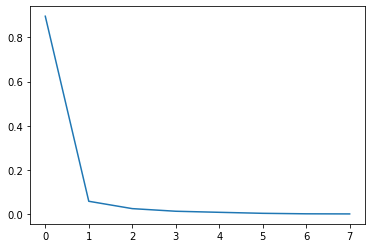

In [20]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

### c. Transform the training and test data using the eigenvectors from point b.

In [24]:
X_train2 = pca.transform(X_train)
X_test2 = pca.transform(X_test)

### d. Fit a logistic regression model:
*   to the original training set
*   to every component
* to the first 7 components
* to the first 2 components

Calculate model accuracy for each case.



In [22]:
m = LogisticRegression(penalty = 'none', max_iter=1000)
m.fit(X_train, y_train)
print('Accuracy: ', m.score(X_test, y_test))

Accuracy:  0.8008658008658008


In [25]:
m.fit(X_train2, y_train)
print('Accuracy: ', m.score(X_test2, y_test))

Accuracy:  0.8008658008658008


In [28]:
m.fit(X_train2[:,0:7], y_train)
print('Accuracy: ', m.score(X_test2[:,0:7], y_test))

Accuracy:  0.8008658008658008


In [29]:
m.fit(X_train2[:,0:2], y_train)
print('Accuracy: ', m.score(X_test2[:,0:2], y_test))

Accuracy:  0.7748917748917749
